In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("gender_classification_v7.csv")

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
#EDA

In [5]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:

df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


In [9]:
#Feature Extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [10]:
import seaborn as sns

In [11]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


<ipython-input-12-0e5f50984ae8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.forehead_height_cm)


<Axes: xlabel='forehead_height_cm', ylabel='Density'>

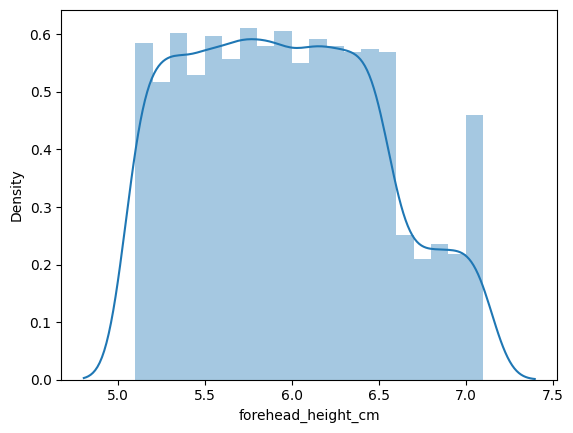

In [12]:
sns.distplot(df.forehead_height_cm)

<ipython-input-13-bfeb655d9779>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.forehead_width_cm)


<Axes: xlabel='forehead_width_cm', ylabel='Density'>

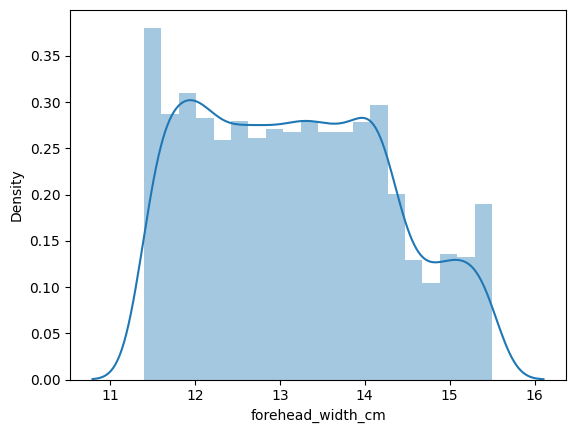

In [13]:
sns.distplot(df.forehead_width_cm)

<Axes: xlabel='long_hair', ylabel='forehead_width_cm'>

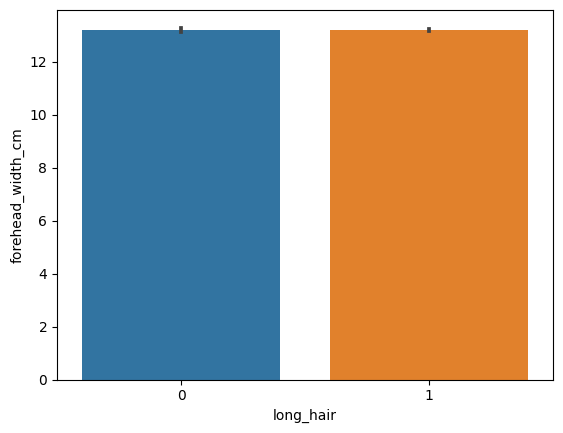

In [14]:
sns.barplot(data = df, x =df.long_hair, y = df.forehead_width_cm)

<Axes: xlabel='long_hair', ylabel='distance_nose_to_lip_long'>

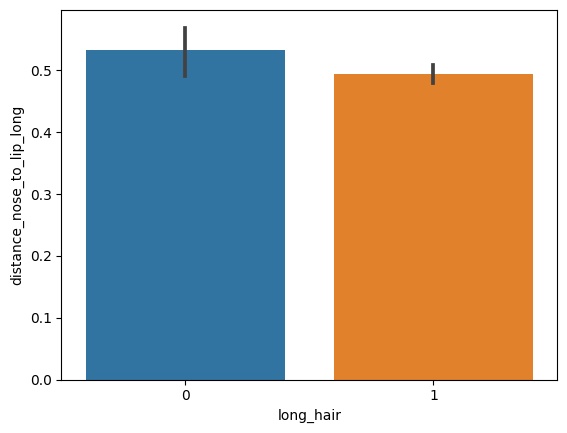

In [15]:
sns.barplot(data = df, x = df.long_hair,y = df.distance_nose_to_lip_long)

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1 = LE.fit_transform(df["gender"])
df1 = pd.DataFrame(df1)

In [17]:
X = df.iloc[ :,0:7]

In [18]:
Y = df1
Y.columns = ["Gender"]

In [19]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [20]:
Y

,Gender
0,1
1,0
2,1
3,1
4,0
...,...
4996,0
4997,0
4998,0
4999,0


<Axes: xlabel='nose_wide', ylabel='lips_thin'>

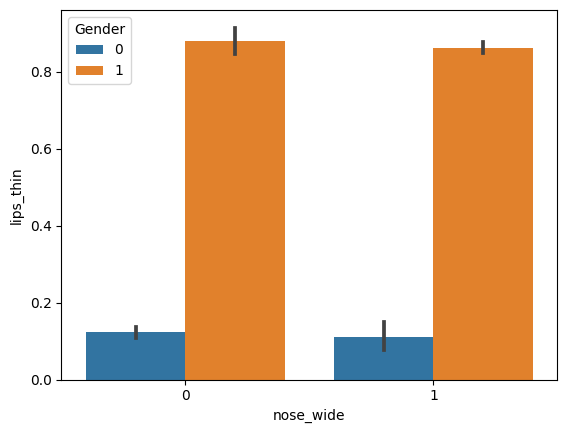

In [21]:
sns.barplot(x = X.nose_wide, y = X.lips_thin, hue = Y.Gender)

<Axes: xlabel='nose_long', ylabel='forehead_height_cm'>

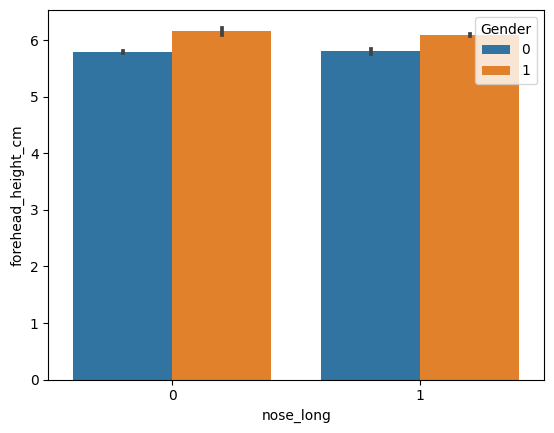

In [22]:
sns.barplot( x = X.nose_long, y = X.forehead_height_cm, hue =Y.Gender)

In [23]:

array1 = X.values
array2  = Y.values
X1 = array1[:,0:8]
Y1 = array2[:,0:1]

In [24]:
from numpy.core.arrayprint import set_printoptions

#Feature Extraction
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
test1 = SelectKBest(score_func = mutual_info_classif, k = 2)
test = SelectKBest(score_func=f_classif, k = 2)
set_printoptions(precision = 3)
f = test1.fit(X1,Y1)
fit = test.fit(X1,Y1)
print(fit.scores_)
print(f.scores_)


[5.796e-01 6.282e+02 4.161e+02 6.772e+03 6.203e+03 6.173e+03 6.621e+03]
[0.    0.128 0.109 0.328 0.31  0.3   0.322]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [26]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 400)
rfe = RFE(model, n_features_to_select =4, step =1)
g = rfe.fit(X1,Y1)
g.n_features_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

4

In [27]:
g.support_

array([False, False, False,  True,  True,  True,  True])

In [28]:
g.ranking_

array([4, 3, 2, 1, 1, 1, 1])

In [29]:
#Feature Importance using DecisionTree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X1,Y1)
print(model.feature_importances_)

[0.003 0.056 0.046 0.577 0.093 0.1   0.124]


In [30]:
Y["Gender"].value_counts()

0    2501
1    2500
Name: Gender, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)


In [32]:
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(3500, 7) (1501, 7) (3500, 1) (1501, 1)


Model Building

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
LR.score(X_train,Y_train).round(2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97

In [34]:
#checking the precision,recall,f1-score,accuracy_score.
from sklearn.metrics import classification_report,accuracy_score
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)
print(classification_report(Y_pred_test,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       745
           1       0.96      0.97      0.96       756

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [35]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
k = StratifiedKFold(n_splits = 10)
results = cross_val_score(LR,X,Y,cv=k)
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.948 0.974 0.966 0.958 0.974 0.976 0.97  0.966 0.976 0.974]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("StratifiedKFold for logistic regression is",np.mean(results).round(2))

StratifiedKFold for logistic regression is 0.97


Support Vector Classifier


In [38]:
from sklearn.svm import SVC
svm = SVC(kernel='poly',degree=6,gamma = 0.1,C = 100)
svm.fit(X_train, Y_train)
Y_predtrain_SVM = svm.predict(X_train)
Y_predtest_SVM = svm.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predtest_SVM))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       739
           1       0.97      0.96      0.97       762

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [40]:
Y_predtrain_SVM

array([1, 0, 1, ..., 0, 0, 0])

In [41]:
k = StratifiedKFold(n_splits = 3)
results1 = cross_val_score(svm,X,Y,cv = k)
print("Stratified KFold that ",np.mean(results1).round(2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stratified KFold that  0.96


KNN Classifier


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
KNN = KNeighborsClassifier()
param_grid = {
    'n_neighbors' : [1,3,5,7,9,11,13,14,15]
}
rid = GridSearchCV(KNN,param_grid,cv = 5, n_jobs = -1)
rt = rid.fit(X_train,Y_train)
print(rid.best_params_)
print(rid.best_score_)

{'n_neighbors': 14}
0.9754285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
KNN = KNeighborsClassifier(n_neighbors = 14)
KNN.fit(X_train,Y_train)
Y_predtest = KNN.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_predtest,Y_test))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       767
           1       0.95      0.99      0.97       734

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
k = StratifiedKFold(n_splits = 10)
res_KNN = cross_val_score(KNN,X,Y,cv =k)
print("Stratified k sccore is " ,np.mean(res_KNN).round(2))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Stratified k sccore is  0.97


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Decision Tree Classifier


In [40]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
param_grid = {
    'criterion': ["gini", "Entropy"],
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [2,10,15,20,25]

}
ig = GridSearchCV(DT,param_grid,cv = 5, n_jobs = -1)
itg = ig.fit(X_train,Y_train)
print(itg.best_params_)
print(itg.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.9719999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
625 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
353 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

In [41]:
DT = DecisionTreeClassifier(criterion= 'gini', max_depth = 7, min_samples_leaf = 1, min_samples_split = 15)
DT.fit(X_train,Y_train)
y_pred_Dt = DT.predict(X_test)
print(classification_report(y_pred_Dt,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       768
           1       0.95      0.99      0.97       733

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [42]:
k = StratifiedKFold(n_splits = 10)
rs = cross_val_score(DT, X,Y,cv =k)
print("K is the ", np.mean(rs).round(2))

K is the  0.97


Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
RFF = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['auto','sqrt'],
    'max_depth': [2,3,5,7],
    'min_samples_split': [2,5,10]
}
ra = GridSearchCV(RFF,param_grid,cv = 5, n_jobs = -1)
ra_result = ra.fit(X_train,Y_train)
print(ra_result.best_params_)
print(ra_result.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 400}
0.9748571428571429


In [44]:
RFF = RandomForestClassifier(n_estimators = 200, max_depth=5,max_features = 'auto', min_samples_split  = 2)
RFF.fit(X_train,Y_train)
y_predtest_Rf = RFF.predict(X_test)
print(classification_report(y_predtest_Rf,Y_test))

<ipython-input-44-cf698e08f6aa>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFF.fit(X_train,Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       749
           1       0.96      0.97      0.96       752

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [45]:
k  =StratifiedKFold(n_splits = 5)
rt_rff= cross_val_score(RFF, X,Y,cv = k, )
print(rt_rff)
print(np.mean(rt_rff).round(2))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

[0.962 0.969 0.979 0.972 0.983]
0.97


In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier()
param_grid = {
    'learning_rate'    : [0.1,0.01,0.2,0.3,0.02,0.001] ,
     'max_depth'        : [ 3, 4, 5, 6, 8],
     'gamma'            : [  0.1, 0.2 , 0.3, 0.4 ]
}
grid_result = GridSearchCV(xgb_model, param_grid, cv=5,n_jobs = -1, scoring='accuracy')
grid_result_XGB = grid_result.fit(X_train,Y_train)
print(grid_result_XGB.best_params_)
print(grid_result_XGB.best_score_)

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3}
0.9745714285714285


In [47]:
import xgboost as xgb
XGB = xgb.XGBClassifier(gamma =0.1,max_depth = 3, learning_rate = 0.1)
XGB.fit(X_train, Y_train)
Y_predtrain_xgb = XGB.predict(X_train)
Y_predtest_xgb = XGB.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predtest_xgb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       739
           1       0.99      0.95      0.97       762

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [48]:
K = StratifiedKFold(n_splits = 10)
result_xgb = cross_val_score(XGB,X,Y,cv = K)
print(result_xgb)
print(np.mean(result_xgb).round(2))

[0.968 0.96  0.974 0.97  0.986 0.984 0.978 0.97  0.986 0.978]
0.98


Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
MNB = MultinomialNB()
param_grid = {
    'alpha' : [0.1,0.01,0.001,0.001,1,10,100]
}
grid_result = GridSearchCV(MNB, param_grid, cv=5,n_jobs = -1, scoring='accuracy')
grid_result_XGB = grid_result.fit(X_train,Y_train)
print(grid_result_XGB.best_params_)
print(grid_result_XGB.best_score_)

{'alpha': 0.1}
0.9594285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha = 0.1)
MNB.fit(X_train, Y_train)
Y_predtrain_mnb = MNB.predict(X_train)
Y_predtest_mnb = MNB.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predtest_mnb))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       739
           1       0.92      0.99      0.96       762

    accuracy                           0.95      1501
   macro avg       0.96      0.95      0.95      1501
weighted avg       0.96      0.95      0.95      1501



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
K = StratifiedKFold(n_splits = 10)
result_mnb = cross_val_score(MNB,X,Y,cv = K)
print(result_mnb)
print(np.mean(result_mnb).round(2))

[0.942 0.964 0.96  0.948 0.958 0.962 0.958 0.962 0.966 0.958]
0.96


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Bagging Classifier


In [54]:
from sklearn.ensemble import BaggingClassifier
BG = BaggingClassifier()
param_grid ={
    'n_estimators' : [200, 300, 400, 500],
    'max_samples' : [0.5, 0.6, 0.7, 0.8],
    'max_features' : [0.5, 0.6, 0.7, 0.8]
}
grid_result  = GridSearchCV(BG,param_grid,cv = 5,n_jobs = -1)
grid_result_BC = grid_result.fit(X_train,Y_train)
print(grid_result_BC.best_params_)
print(grid_result_BC.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 300}
0.9788571428571429


In [55]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator = BG,n_estimators = 200,max_samples = 0.8,max_features = 0.5)
bag.fit(X_train, Y_train)
Y_predtrain_bag = bag.predict(X_train)
Y_predtest_bag = bag.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predtest_bag))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       739
           1       0.99      0.95      0.97       762

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [56]:
k = StratifiedKFold(n_splits = 10)
results_Bagging = cross_val_score(bag,X,Y,cv=k,n_jobs = -1)
print(np.mean(results_Bagging).round(2))

0.98


Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC = GradientBoostingClassifier()
param_grid ={
    'n_estimators' : [200, 300, 400, 500],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2, 4, 5, 6],
    'min_samples_split' : [2, 5, 10]
}
grid_result  = GridSearchCV(GBC,param_grid,cv = 5,n_jobs = -1)
grid_result_GBC = grid_result.fit(X_train,Y_train)
print(grid_result_GBC.best_params_)
print(grid_result_GBC.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 400}
0.9751428571428573


In [58]:
GBC = GradientBoostingClassifier(max_depth = 5, max_features = 'sqrt', min_samples_split = 2, n_estimators= 400)
GBC.fit(X_train,Y_train)
Y_predtrain_gbc = GBC.predict(X_train)
Y_predtest_gbc = GBC.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predtest_gbc))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       739
           1       0.96      0.96      0.96       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [59]:
K = StratifiedKFold(n_splits = 10)
result_gbc = cross_val_score(GBC,X,Y,cv = K)
print(result_gbc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[0.956 0.962 0.966 0.958 0.976 0.978 0.97  0.968 0.974 0.976]


In [60]:
print("StratifiedKFold for Gradient Boosting Classifier is",np.mean(result_gbc).round(2))

StratifiedKFold for Gradient Boosting Classifier is 0.97


In [61]:
result = {'Algorithm' :['Logistic Regression','Support Vector Classifier','KNN Classifier','Decision Tree Classifier','Random Forest Classifier','XGBoost','Naive Bayes','Bagging Classifier','Gradient Boosting Classifier'],
'Accuracy': [97,6,97,97,97,98,96,98,97]}

In [63]:
rt  =pd.DataFrame(result)

In [64]:
rt

,Algorithm,Accuracy
0,Logistic Regression,97
1,Support Vector Classifier,6
2,KNN Classifier,97
3,Decision Tree Classifier,97
4,Random Forest Classifier,97
5,XGBoost,98
6,Naive Bayes,96
7,Bagging Classifier,98
8,Gradient Boosting Classifier,97
